In [9]:
import pandas as pd

url = 'https://raw.githubusercontent.com/sang2607-b/ev-project/main/ev_charging_stations_india.csv'
df = pd.read_csv(url, skiprows=1)

print(df.head())



   Unnamed: 0            Station Name  Latitude  Longitude Station Type  \
0         NaN      EV Station Delhi 1   28.6139    77.2090         Fast   
1         NaN     EV Station Mumbai 1   19.0760    72.8777         Fast   
2         NaN       EV Station Pune 1   18.5204    73.8567         Slow   
3         NaN  EV Station Bengaluru 1   12.9716    77.5946         Fast   
4         NaN    EV Station Chennai 1   13.0827    80.2707         Fast   

         State  Unnamed: 6  
0        Delhi         NaN  
1  Maharashtra         NaN  
2  Maharashtra         NaN  
3    Karnataka         NaN  
4   Tamil Nadu         NaN  


In [13]:
import pandas as pd

# Load from GitHub
url = 'https://raw.githubusercontent.com/sang2607-b/ev-project/main/ev_charging_stations_india.csv'
df = pd.read_csv(url, skiprows=1)

# Drop unused/unwanted columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 6'], errors='ignore')

# Remove rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Reset index
df = df.reset_index(drop=True)

print(df.head())


             Station Name  Latitude  Longitude Station Type        State
0      EV Station Delhi 1   28.6139    77.2090         Fast        Delhi
1     EV Station Mumbai 1   19.0760    72.8777         Fast  Maharashtra
2       EV Station Pune 1   18.5204    73.8567         Slow  Maharashtra
3  EV Station Bengaluru 1   12.9716    77.5946         Fast    Karnataka
4    EV Station Chennai 1   13.0827    80.2707         Fast   Tamil Nadu


In [14]:
import folium
from folium.plugins import MarkerCluster

# Initialize map
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)
marker_cluster = MarkerCluster().add_to(m)

# Add charging stations
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station Name'],
        tooltip=row['Station Type']
    ).add_to(marker_cluster)

# Save to file
m.save("ev_station_map.html")
print("✅ Map saved as ev_station_map.html")


✅ Map saved as ev_station_map.html


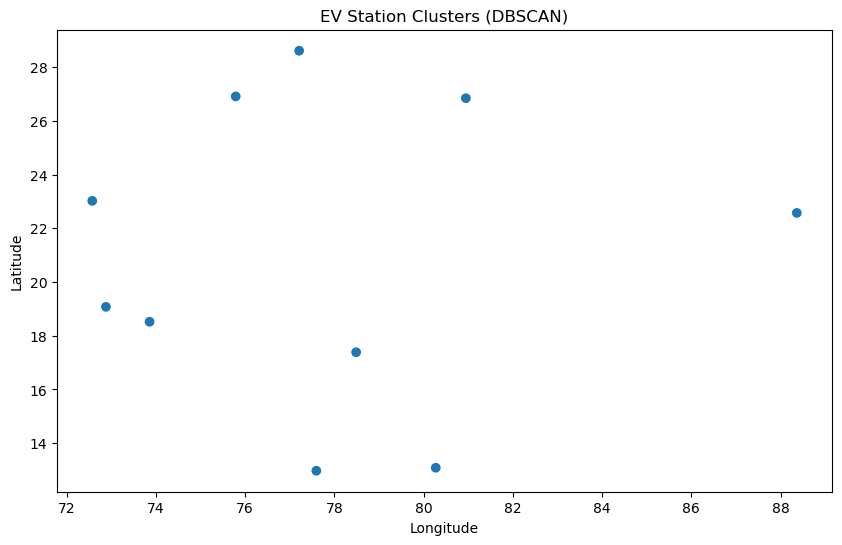

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

coords = df[['Latitude', 'Longitude']]
scaled = StandardScaler().fit_transform(coords)

db = DBSCAN(eps=0.3, min_samples=5).fit(scaled)
df['Cluster'] = db.labels_

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='tab10')
plt.title('EV Station Clusters (DBSCAN)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


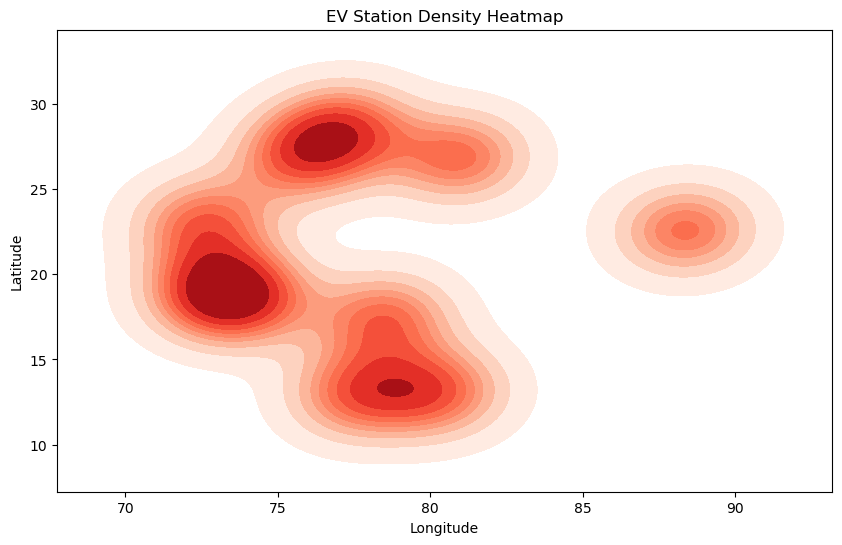

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['Longitude'],
    y=df['Latitude'],
    fill=True,
    cmap="Reds",
    bw_adjust=0.5
)
plt.title("EV Station Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
